In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [86]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
from os import path
path ='/content/drive/MyDrive/CVS/housing.csv'
df = pd.read_csv(path)

df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [88]:
df_new = df[["longitude","latitude"]] #menlicing data yang akan di analisis
df_new.head

<bound method NDFrame.head of        longitude  latitude
0        -122.23     37.88
1        -122.22     37.86
2        -122.24     37.85
3        -122.25     37.85
4        -122.25     37.85
...          ...       ...
20635    -121.09     39.48
20636    -121.21     39.49
20637    -121.22     39.43
20638    -121.32     39.43
20639    -121.24     39.37

[20640 rows x 2 columns]>

In [89]:
df_new.describe()

,longitude,latitude
count,20640.000000,20640.000000
mean,-119.569704,35.631861
std,2.003532,2.135952
min,-124.350000,32.540000
25%,-121.800000,33.930000
50%,-118.490000,34.260000
75%,-118.010000,37.710000
max,-114.310000,41.950000


In [90]:
df_new.isnull().sum() # mencari data yang null

longitude    0
latitude     0
dtype: int64

In [91]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


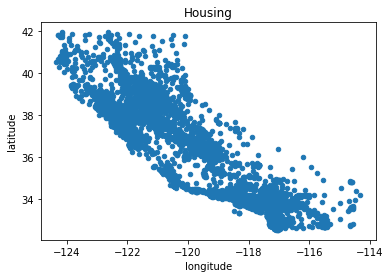

In [138]:
#
df.plot(kind='scatter', x='longitude', y='latitude')

plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Housing')
plt.show()

In [173]:
#step 1
k = 3 #asumsikan kita akan mencari 3 cluster
np.random.seed(40)

#disini kita akan mendapat 3 poin random centeroid 
random_centroids=[]
for i in range(1,k+1):
  random_centroids.append([np.random.randint(-124, -114), np.random.randint(32,42)])
print('randomly selected points as random_centroids:',random_centroids)  

randomly selected points as random_centroids: [[-118, 39], [-119, 40], [-116, 34]]


In [148]:
df = df[["longitude","latitude"]]
df.head()

,longitude,latitude
0,-122.23,37.88
1,-122.22,37.86
2,-122.24,37.85
3,-122.25,37.85
4,-122.25,37.85


In [141]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

KMeans(n_clusters=3)

In [108]:
labels = kmeans.predict(df)
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [109]:
centroids = kmeans.cluster_centers_
centroids

array([[-121.93015196,   38.11351449],
       [-117.88493836,   33.82435098],
       [-119.70940315,   35.9956267 ]])

In [110]:
kmeans.inertia_

18287.012244011297

In [146]:
inertia_list = []
for num_clusters in np.arange(1, 21):
  kmeans = KMeans(n_clusters=num_clusters)
  kmeans.fit(df)
  inertia_list.append(kmeans.inertia_)

In [132]:
inertia_list

[177008.98028089074,
 26623.86489291528,
 18287.010667831823,
 14262.990920708125,
 10339.955797934173,
 8022.063646177845,
 6814.006807953878,
 6049.672438076637,
 5277.061426498145,
 4804.970108546968,
 4308.953929176258,
 3828.6659898755984,
 3453.2148351845344,
 3126.115711928849,
 2782.03109425654,
 2532.874277396546,
 2325.6928969624437,
 2190.519183158446,
 2075.3183833307075,
 1983.4904476133756]

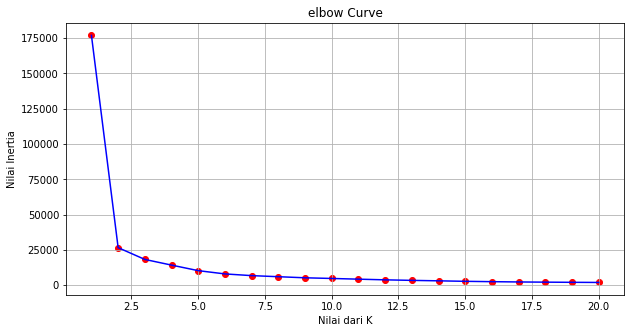

In [133]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, 21), inertia_list, color='blue')
plt.scatter(np.arange(1, 21), inertia_list, color='red')
plt.grid(True)
plt.xlabel('Nilai dari K')
plt.ylabel('Nilai Inertia')
plt.title('elbow Curve')
plt.show()

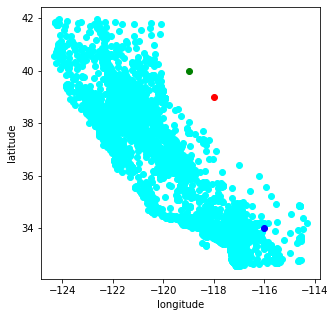

In [174]:
#
plt.figure(figsize=(5, 5))
plt.scatter(df_new.iloc[:,0], df_new.iloc[:,1], color='cyan')
length = len(random_centroids)
colors1=['r','g','b','cyan','yellow','black']
for i in range(length) :
  plt.scatter(*random_centroids[i],color=colors1[i])
  plt.xlabel('longitude')
  plt.ylabel('latitude')
plt.show()  

In [116]:
#Langkah kedua

#Here, we are calculating the distance between the datapoints and our centroids and assigning each data-point to the closest cluster
def assignment(df_new,random_centroids):

  for i in range(length) :
    df_new['Distance from Centroid {}'.format(i)]=(np.sqrt((df_new.iloc[:,0] - random_centroids[i][0]) * 2 + (df_new.iloc[:,1] - random_centroids[i][1]) * 2))
   
  list1=[]
  list2=[]
  for a,b,c in zip(df_new['Distance from Centroid 0'],df_new['Distance from Centroid 1'],df_new['Distance from Centroid 2']):
    d = min(a,b,c)
   
    if d == a:
      list1.append(0)
      list2.append('r')
    elif d == b:
      list1.append(1)
      list2.append('g')
    else:
      list1.append(2)
      list2.append('b')
  df_new['Closest_Centroid'] = list1
  df_new['Color']=list2
  return df_new

In [171]:
df_new = assignment(df_new, random_centroids)
df_new.head()

,longitude,latitude,Distance from Centroid 0,Distance from Centroid 1,Distance from Centroid 2,Closest_Centroid,Color
0,-122.23,37.88,NaN,NaN,NaN,2,b
1,-122.22,37.86,NaN,NaN,NaN,2,b
2,-122.24,37.85,NaN,NaN,NaN,2,b
3,-122.25,37.85,NaN,NaN,NaN,2,b
4,-122.25,37.85,NaN,NaN,NaN,2,b


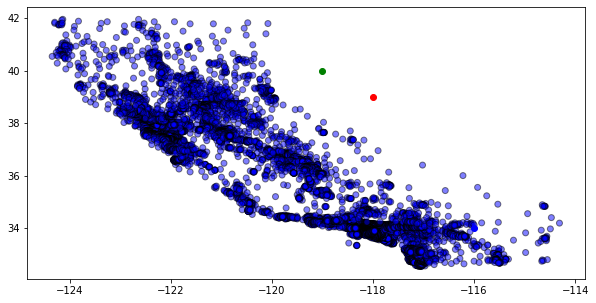

In [175]:
plt.figure(figsize=(10,5))
plt.scatter(df_new.iloc[:,0],df_new.iloc[:,1],color = df_new['Color'],alpha = 0.5,edgecolor = 'k')
for i in range(length):
  plt.scatter(*random_centroids[i],color=colors1[i])

In [52]:
#step-3
def update(parameter):
  for i in range(length):
    random_centroids[i][0] = np.mean(df_new[df_new['Closest_Centroid'] == i]['longitude'])
    random_centroids[i][1] = np.mean(df_new[df_new['Closest_Centroid'] == i]['latitude'])
  return parameter  

In [53]:
random_centroids = update(random_centroids)
random_centroids

[[nan, nan], [nan, nan], [-119.56970445736432, 35.63186143410853]]

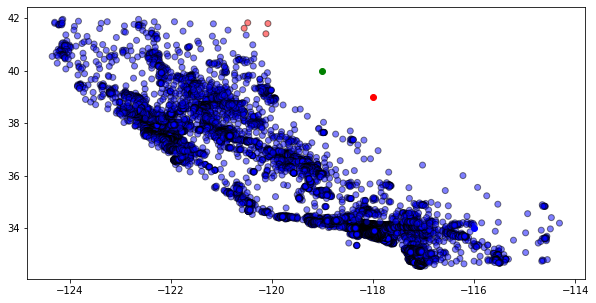

In [176]:
#step last
#mencari titik centroid paling tepat
df_new = assignment(df_new, random_centroids)
df_new.head()
plt.figure(figsize=(10, 5))
plt.scatter(df_new.iloc[:,0], df_new.iloc[:,1], color=df_new['Color'], alpha=0.5, edgecolor='k')
for i in range(length):
  plt.scatter(*random_centroids[i], color=colors1[i])
plt.show()


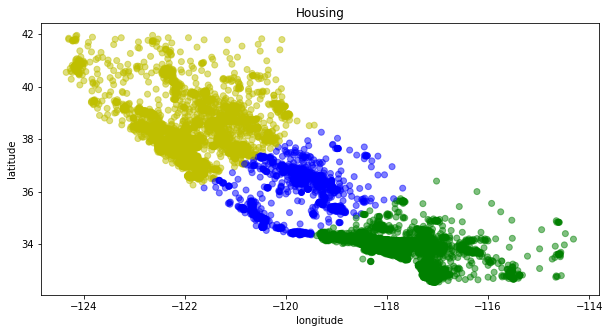

In [177]:
plt.figure(figsize=(10, 5))
colmap = {1:'y',2:'g',3:'b',4:'r',5:'c'}
colors = map(lambda x: colmap[x+1], labels)
print(colors)
colors1=list(colors)
plt.scatter(df['longitude'], df['latitude'], color=colors1, alpha=0.5)
for idx, centroid in enumerate(centroids):
  plt.scatter(*centroid, color=colmap[idx+1])
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Housing')
plt.show()  

randomly selected points as random_centroids: [[71, 92], [8, 38], [57, 51]]
